# Laboratório de Features

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

In [33]:
dataset_path = "../datasets/1.0v/"

In [34]:
!ls ../datasets/1.0v

Features.pdf  infos.csv  items.csv  orders.csv	README.md  Task_2020.pdf


## Loading our datasets...

In [35]:
infos = pd.read_csv(dataset_path + 'infos.csv', sep='|')
items = pd.read_csv(dataset_path + 'items.csv', sep='|')
orders = pd.read_csv(dataset_path + 'orders.csv', sep='|')

## FIle heads

In [58]:
orders.tail()

,time,transactID,itemID,order,salesPrice
2181950,2018-06-29 23:54:22,2040347,9217,1,23.50
2181951,2018-06-29 23:55:09,2260943,2175,1,11.60
2181952,2018-06-29 23:55:09,2260943,2061,1,1.03
2181953,2018-06-29 23:55:09,2260943,2195,1,18.73
2181954,2018-06-29 23:57:01,2525,8462,1,18.93


In [37]:
items.head()

,itemID,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
0,1,0,1,4.38,1,1,1,8.84
1,2,0,2,3.00,1,2,1,16.92
2,3,0,3,5.00,1,3,1,15.89
3,4,0,2,4.44,1,2,1,40.17
4,5,0,2,2.33,1,1,1,17.04


In [38]:
infos.head()

,itemID,simulationPrice,promotion
0,1,3.43,NaN
1,2,9.15,NaN
2,3,14.04,NaN
3,4,14.10,NaN
4,5,7.48,NaN


## Basic stats

**Conclusion**: Our items have a high ```simulationPrice``` standard deviation, which affects directly our approach.

In [39]:
infos.describe().round(1)

,itemID,simulationPrice
count,10463.0,10463.0
mean,5232.0,122.0
std,3020.6,469.7
min,1.0,0.4
25%,2616.5,9.0
50%,5232.0,23.8
75%,7847.5,63.1
max,10463.0,9055.1


In [40]:
items.describe().round(1)

,itemID,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
count,10463.0,10463.0,10463.0,10463.0,10463.0,10463.0,10463.0,10463.0
mean,5232.0,56.1,115.7,1.4,4.2,22.5,4.1,118.3
std,3020.6,76.0,77.3,2.1,2.5,14.9,2.5,339.3
min,1.0,0.0,1.0,0.0,1.0,1.0,1.0,2.5
25%,2616.5,0.0,47.0,0.0,2.0,8.0,2.0,14.0
50%,5232.0,0.0,107.0,0.0,4.0,23.0,4.0,24.2
75%,7847.5,101.0,173.0,4.0,7.0,38.0,7.0,67.9
max,10463.0,274.0,253.0,5.0,8.0,52.0,8.0,6955.0


In [41]:
orders.describe().round(1)

,transactID,itemID,order,salesPrice
count,2181955.0,2181955.0,2181955.0,2181955.0
mean,1073262.0,5247.7,1.2,36.7
std,631257.8,2454.6,0.7,126.1
min,1.0,1.0,1.0,0.0
25%,531377.5,3605.0,1.0,7.1
50%,1065659.0,5200.0,1.0,16.7
75%,1600669.5,7314.0,1.0,34.6
max,2294042.0,10463.0,100.0,9387.0


### Extracting the dates of promotion

This may be useful later on the competition. For now, let's just understand we have access to this data.

In [64]:
promotions = infos['promotion'].value_counts()


infos['promotion'].unique()

array([nan, '2018-07-13', '2018-07-01,2018-07-02,2018-07-13',
       '2018-07-05,2018-07-11', '2018-07-05', '2018-07-01', '2018-07-04',
       '2018-07-08', '2018-07-08,2018-07-13', '2018-07-09', '2018-06-30',
       '2018-07-11', '2018-07-06', '2018-07-08,2018-07-11',
       '2018-06-30,2018-07-13', '2018-06-30,2018-07-01,2018-07-11',
       '2018-07-06,2018-07-13', '2018-07-06,2018-07-10', '2018-07-10',
       '2018-07-08,2018-07-10', '2018-06-30,2018-07-04',
       '2018-07-01,2018-07-10', '2018-07-02', '2018-06-30,2018-07-01',
       '2018-07-04,2018-07-05,2018-07-06', '2018-07-04,2018-07-05',
       '2018-07-01,2018-07-06', '2018-06-30,2018-07-06',
       '2018-07-05,2018-07-13', '2018-07-01,2018-07-02', '2018-07-03',
       '2018-07-03,2018-07-04,2018-07-05',
       '2018-07-03,2018-07-04,2018-07-06', '2018-07-03,2018-07-04',
       '2018-07-03,2018-07-05', '2018-07-04,2018-07-09',
       '2018-07-04,2018-07-06', '2018-07-02,2018-07-04', '2018-07-12',
       '2018-07-02,2018-07-0

### Removing the items that were never sold

In [43]:
# Taking the ids of the items that were sold at least once...
sold_items_id = orders['itemID'].unique()
sold_items_id

array([ 450,   83, 7851, ..., 6427, 8604, 9796])

In [44]:
# Items that were sold at least once will be stored in 'sold_items'
sold_items = items[items.itemID.isin(sold_items_id)]
sold_items

,itemID,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
0,1,0,1,4.38,1,1,1,8.84
1,2,0,2,3.00,1,2,1,16.92
2,3,0,3,5.00,1,3,1,15.89
3,4,0,2,4.44,1,2,1,40.17
4,5,0,2,2.33,1,1,1,17.04
...,...,...,...,...,...,...,...,...
10449,10450,182,227,0.00,8,44,8,36.78
10458,10459,180,253,0.00,8,44,8,56.57
10459,10460,0,253,0.00,8,44,8,163.81
10461,10462,180,253,0.00,8,44,8,166.97


Just making a sanity check to be sure if we really have kept only the items that had been sold at least once...

In [45]:
fact_check = np.array(sold_items.itemID)
fact_check == sorted(sold_items_id)

array([ True,  True,  True, ...,  True,  True,  True])

In [46]:
# We'll extract only the infos about the items that were sold at least once...
sold_infos = infos[infos.itemID.isin(sold_items_id)]
sold_infos

,itemID,simulationPrice,promotion
0,1,3.43,NaN
1,2,9.15,NaN
2,3,14.04,NaN
3,4,14.10,NaN
4,5,7.48,NaN
...,...,...,...
10449,10450,44.43,2018-07-10
10458,10459,14.71,NaN
10459,10460,325.67,NaN
10461,10462,304.30,NaN


Another sanity check...

In [47]:
fact_check_2 = np.array(sold_infos.itemID)
fact_check_2 == sorted(sold_items_id)

array([ True,  True,  True, ...,  True,  True,  True])

### <span style="color:red">Most revenue items</span>

It's very strange that some items are sold below the 'recommended retail price'

In [48]:
# Concatenating the itemID column with the revenue column...
sold_items_revenue = pd.concat([sold_items.itemID, sold_infos.simulationPrice -  sold_items.recommendedRetailPrice], axis=1, names=['itemID', 'revenue'])
sold_items_revenue

,itemID,0
0,1,-5.41
1,2,-7.77
2,3,-1.85
3,4,-26.07
4,5,-9.56
...,...,...
10449,10450,7.65
10458,10459,-41.86
10459,10460,161.86
10461,10462,137.33


In [49]:
items_revenue = pd.concat([items.itemID, infos.simulationPrice -  items.recommendedRetailPrice], axis=1, names=['itemID', 'revenue'])
items_revenue

,itemID,0
0,1,-5.41
1,2,-7.77
2,3,-1.85
3,4,-26.07
4,5,-9.56
...,...,...
10458,10459,-41.86
10459,10460,161.86
10460,10461,62.52
10461,10462,137.33


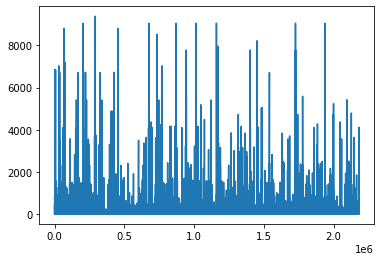

In [57]:
plt.plot(orders.salesPrice)